In [756]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [757]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [758]:
data= pd.read_csv("C:/Users/ltyagi/Desktop/airpred_interval.csv")

In [760]:
data.head()

,gufi,arrival_airport,departure_airport,source_facility,arriva_lat,arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,distance,latitude,longitude,aircraft_type,source_timestamp,on_actual,time_to_land
0,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZDC,35.213,-80.949,152,23,NaN,130.501529,35.858610,-78.821390,B738,6/20/2017 0:32,6/20/2017 1:03,30.900000
1,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZTL,35.213,-80.949,170,30,NaN,130.461131,35.846386,-78.839170,B738,6/20/2017 0:32,6/20/2017 1:03,30.566667
2,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZDC,35.213,-80.949,190,47,NaN,130.746851,35.821110,-78.866940,B738,6/20/2017 0:33,6/20/2017 1:03,29.900000
3,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZTL,35.213,-80.949,204,60,NaN,130.353039,35.811110,-78.892220,B738,6/20/2017 0:33,6/20/2017 1:03,29.533333
4,AAL1121.RDU.CLT.170618.2016.0096.TFM,KCLT,KRDU,KZDC,35.213,-80.949,222,75,NaN,128.423839,35.816110,-78.938614,B738,6/20/2017 0:34,6/20/2017 1:03,28.833333


In [762]:
data['on_actual'] =  pd.to_datetime(data['on_actual'])

In [764]:
data['source_timestamp'] =  pd.to_datetime(data['source_timestamp'])

In [772]:
data.source_timestamp.max()
data.source_timestamp.min()
data.on_actual.max()
data.on_actual.min()

Timestamp('2017-06-29 15:45:00')

Timestamp('2017-06-04 22:00:00')

Timestamp('2017-06-29 17:14:00')

Timestamp('2017-06-04 23:08:00')

In [778]:
data.assigned_altitude_max.isnull().sum()
data.shape

41808

(41808, 16)

In [781]:
data.describe()

,arriva_lat,arrival_long,ground_speed,assigned_altitude,assigned_altitude_max,distance,latitude,longitude,time_to_land
count,4.180800e+04,4.180800e+04,41808.000000,41808.000000,0.0,41808.000000,41808.000000,41808.000000,41808.000000
mean,3.521300e+01,-8.094900e+01,240.678554,71.564437,NaN,223.892384,35.547636,-81.547926,24.905018
std,9.954823e-12,2.023650e-11,62.861695,39.955000,NaN,264.914703,2.248133,5.118218,37.323775
min,3.521300e+01,-8.094900e+01,0.000000,0.000000,NaN,12.834273,17.300000,-122.793610,-12.266667
25%,3.521300e+01,-8.094900e+01,187.000000,40.000000,NaN,131.168441,35.006668,-81.138330,5.416667
50%,3.521300e+01,-8.094900e+01,245.000000,69.000000,NaN,145.177165,35.300000,-80.951660,11.033333
75%,3.521300e+01,-8.094900e+01,287.000000,103.000000,NaN,175.265694,35.592290,-80.630280,24.383333
max,3.521300e+01,-8.094900e+01,615.000000,149.000000,NaN,2290.567248,47.889168,-62.850000,279.316667


In [782]:
data.drop(['assigned_altitude_max'],axis=1,inplace=True)

In [784]:
data.dtypes

gufi                         object
arrival_airport              object
departure_airport            object
source_facility              object
arriva_lat                  float64
arrival_long                float64
ground_speed                  int64
assigned_altitude             int64
distance                    float64
latitude                    float64
longitude                   float64
aircraft_type                object
source_timestamp     datetime64[ns]
on_actual            datetime64[ns]
time_to_land                float64
dtype: object

In [785]:
data.corr()

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land
arriva_lat,1.000000e+00,1.000000e+00,-4.380927e-14,7.241458e-16,7.304534e-15,1.106334e-13,2.772299e-14,-5.921080e-15
arrival_long,1.000000e+00,1.000000e+00,-4.605021e-15,-4.268654e-16,6.769816e-15,1.106237e-13,2.675141e-14,-1.206860e-15
ground_speed,-4.380927e-14,-4.605021e-15,1.000000e+00,8.644249e-01,1.211969e-01,8.069699e-03,-8.428750e-02,1.878655e-01
assigned_altitude,7.241458e-16,-4.268654e-16,8.644249e-01,1.000000e+00,3.056966e-02,2.462057e-02,-1.382065e-02,1.514122e-01
distance,7.304534e-15,6.769816e-15,1.211969e-01,3.056966e-02,1.000000e+00,7.843545e-03,-7.895316e-01,9.194655e-01
latitude,1.106334e-13,1.106237e-13,8.069699e-03,2.462057e-02,7.843545e-03,1.000000e+00,5.551693e-02,2.134354e-01
longitude,2.772299e-14,2.675141e-14,-8.428750e-02,-1.382065e-02,-7.895316e-01,5.551693e-02,1.000000e+00,-6.109991e-01
time_to_land,-5.921080e-15,-1.206860e-15,1.878655e-01,1.514122e-01,9.194655e-01,2.134354e-01,-6.109991e-01,1.000000e+00


In [786]:
data.describe()

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land
count,4.180800e+04,4.180800e+04,41808.000000,41808.000000,41808.000000,41808.000000,41808.000000,41808.000000
mean,3.521300e+01,-8.094900e+01,240.678554,71.564437,223.892384,35.547636,-81.547926,24.905018
std,9.954823e-12,2.023650e-11,62.861695,39.955000,264.914703,2.248133,5.118218,37.323775
min,3.521300e+01,-8.094900e+01,0.000000,0.000000,12.834273,17.300000,-122.793610,-12.266667
25%,3.521300e+01,-8.094900e+01,187.000000,40.000000,131.168441,35.006668,-81.138330,5.416667
50%,3.521300e+01,-8.094900e+01,245.000000,69.000000,145.177165,35.300000,-80.951660,11.033333
75%,3.521300e+01,-8.094900e+01,287.000000,103.000000,175.265694,35.592290,-80.630280,24.383333
max,3.521300e+01,-8.094900e+01,615.000000,149.000000,2290.567248,47.889168,-62.850000,279.316667


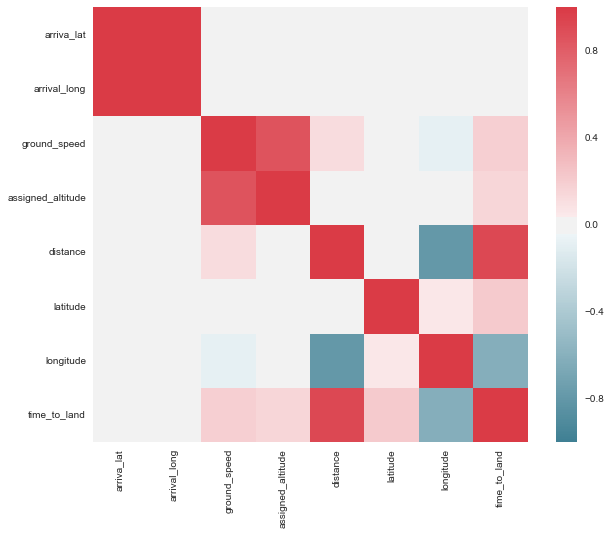

In [787]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [707]:
#data.drop(data.columns[[0,1,2,3,11,12,13]],axis=1,inplace=True)

In [788]:
data.columns

Index(['gufi', 'arrival_airport', 'departure_airport', 'source_facility',
       'arriva_lat', 'arrival_long', 'ground_speed', 'assigned_altitude',
       'distance', 'latitude', 'longitude', 'aircraft_type',
       'source_timestamp', 'on_actual', 'time_to_land'],
      dtype='object')

In [790]:
data.dtypes

gufi                         object
arrival_airport              object
departure_airport            object
source_facility              object
arriva_lat                  float64
arrival_long                float64
ground_speed                  int64
assigned_altitude             int64
distance                    float64
latitude                    float64
longitude                   float64
aircraft_type                object
source_timestamp     datetime64[ns]
on_actual            datetime64[ns]
time_to_land                float64
dtype: object

In [791]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [792]:
data.columns

Index(['gufi', 'arrival_airport', 'departure_airport', 'source_facility',
       'arriva_lat', 'arrival_long', 'ground_speed', 'assigned_altitude',
       'distance', 'latitude', 'longitude', 'aircraft_type',
       'source_timestamp', 'on_actual', 'time_to_land'],
      dtype='object')

In [711]:
## Distance Squared, 
## diff in lat and long respectively for each record (time stamp),
## delta lat , delta_long
## estimated arrival time , on_estimated ( )

In [712]:
### Where will be getting after predicting time to landing ??? 

data.head()

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land
0,35.213,-80.949,152,23,130.501529,35.858610,-78.821390,30.900000
1,35.213,-80.949,170,30,130.461131,35.846386,-78.839170,30.566667
2,35.213,-80.949,190,47,130.746851,35.821110,-78.866940,29.900000
3,35.213,-80.949,204,60,130.353039,35.811110,-78.892220,29.533333
4,35.213,-80.949,222,75,128.423839,35.816110,-78.938614,28.833333


In [713]:
X=data.ix[:,0:7]

In [714]:
Y=data.ix[:,'time_to_land']

In [715]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [716]:
reg=linear_model.LinearRegression()

In [717]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# MODEL Evaluation

In [718]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,2)))

arriva_lat: 0.0
arrival_long: 0.0
ground_speed: -0.07
assigned_altitude: 0.2
distance: 0.16
latitude: 3.08
longitude: 2.01


In [719]:
print('R Squared Value ',reg.score(X_test,Y_test))

R Squared Value  0.931465429835


In [720]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 93.1922541019
Mean absolute error for Training : 6.71873265234

Testing Error Evaluation
MSE for the Test Model : 95.2700791721
Mean absolute error for Test : 6.78102281363


# Feature Engineering :

In [721]:
data['distance1']=(data['distance'])**2

In [722]:
data.columns


Index(['arriva_lat', 'arrival_long', 'ground_speed', 'assigned_altitude',
       'distance', 'latitude', 'longitude', 'time_to_land', 'distance1'],
      dtype='object')

In [723]:
data['delta_lat']=data['latitude']-data['arriva_lat']
data['delta_long']=data['longitude']-data['arrival_long']

In [724]:
data_new= pd.DataFrame(data)

In [725]:
data_new.columns

Index(['arriva_lat', 'arrival_long', 'ground_speed', 'assigned_altitude',
       'distance', 'latitude', 'longitude', 'time_to_land', 'distance1',
       'delta_lat', 'delta_long'],
      dtype='object')

In [726]:
#data_new=data_new.drop(data_new.columns[[4,5,6]],axis=1)

In [727]:
data_new

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land,distance1,delta_lat,delta_long
0,35.213,-80.949,152,23,130.501529,35.858610,-78.821390,30.900000,17030.649097,0.645610,2.127610
1,35.213,-80.949,170,30,130.461131,35.846386,-78.839170,30.566667,17020.106754,0.633386,2.109830
2,35.213,-80.949,190,47,130.746851,35.821110,-78.866940,29.900000,17094.739020,0.608110,2.082060
3,35.213,-80.949,204,60,130.353039,35.811110,-78.892220,29.533333,16991.914829,0.598110,2.056780
4,35.213,-80.949,222,75,128.423839,35.816110,-78.938614,28.833333,16492.682321,0.603110,2.010386
5,35.213,-80.949,239,88,127.176660,35.817223,-78.972220,28.500000,16173.902747,0.604223,1.976780
6,35.213,-80.949,246,110,124.574783,35.821390,-79.040830,27.816667,15518.876659,0.608390,1.908170
7,35.213,-80.949,249,117,123.936282,35.821667,-79.059166,27.450000,15360.202070,0.608667,1.889834
8,35.213,-80.949,279,136,121.000843,35.826942,-79.138610,26.766667,14641.204031,0.613942,1.810390
9,35.213,-80.949,280,146,119.669331,35.828888,-79.176384,26.416667,14320.748734,0.615888,1.772616


In [728]:
data_close = data_new[data_new.distance < 20]

In [729]:
#data_mid   = data_new[(data_new.distance < 150) and (data_new.distance > 20)]
#data_Far > 150 Distance 

In [730]:
data_close

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land,distance1,delta_lat,delta_long
36063,35.213,-80.949,173,40,19.880477,37.240833,-80.057780,37.950000,395.233386,2.027833,0.891220
36064,35.213,-80.949,169,48,19.320217,37.223057,-80.068886,37.450000,373.270800,2.010057,0.880114
36065,35.213,-80.949,179,59,19.955268,37.174446,-80.066940,36.383333,398.212739,1.961446,0.882060
36440,35.213,-80.949,164,63,18.996464,37.206670,-80.076940,35.716667,360.865632,1.993670,0.872060
36441,35.213,-80.949,174,72,18.019923,37.178333,-80.101944,35.016667,324.717623,1.965333,0.847056
36442,35.213,-80.949,169,76,17.977210,37.165836,-80.107220,34.700000,323.180088,1.952836,0.841780
36443,35.213,-80.949,173,89,17.285171,37.125553,-80.141945,33.666667,298.777130,1.912553,0.807055
36444,35.213,-80.949,175,100,17.430739,37.082500,-80.174995,32.600000,303.830659,1.869500,0.774005
36445,35.213,-80.949,219,100,18.924971,37.019444,-80.220830,31.600000,358.154520,1.806444,0.728170
36446,35.213,-80.949,248,100,19.865414,36.989445,-80.249440,31.033333,394.634683,1.776445,0.699560


In [731]:
data_close['distance2']=np.log(data_close['distance'])

C:\Users\ltyagi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [732]:
data_close

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land,distance1,delta_lat,delta_long,distance2
36063,35.213,-80.949,173,40,19.880477,37.240833,-80.057780,37.950000,395.233386,2.027833,0.891220,2.989738
36064,35.213,-80.949,169,48,19.320217,37.223057,-80.068886,37.450000,373.270800,2.010057,0.880114,2.961152
36065,35.213,-80.949,179,59,19.955268,37.174446,-80.066940,36.383333,398.212739,1.961446,0.882060,2.993493
36440,35.213,-80.949,164,63,18.996464,37.206670,-80.076940,35.716667,360.865632,1.993670,0.872060,2.944253
36441,35.213,-80.949,174,72,18.019923,37.178333,-80.101944,35.016667,324.717623,1.965333,0.847056,2.891478
36442,35.213,-80.949,169,76,17.977210,37.165836,-80.107220,34.700000,323.180088,1.952836,0.841780,2.889105
36443,35.213,-80.949,173,89,17.285171,37.125553,-80.141945,33.666667,298.777130,1.912553,0.807055,2.849849
36444,35.213,-80.949,175,100,17.430739,37.082500,-80.174995,32.600000,303.830659,1.869500,0.774005,2.858235
36445,35.213,-80.949,219,100,18.924971,37.019444,-80.220830,31.600000,358.154520,1.806444,0.728170,2.940482
36446,35.213,-80.949,248,100,19.865414,36.989445,-80.249440,31.033333,394.634683,1.776445,0.699560,2.988980


In [750]:
X=data_close.ix[:,[0,1,2,3,4,5,6,8,9,10]]
X.columns

Index(['arriva_lat', 'arrival_long', 'ground_speed', 'assigned_altitude',
       'distance', 'latitude', 'longitude', 'distance1', 'delta_lat',
       'delta_long'],
      dtype='object')

In [751]:
Y=data_close.ix[:,'time_to_land']

In [752]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [753]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [754]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,6)))

arriva_lat: 0.0
arrival_long: 0.0
ground_speed: -0.075135
assigned_altitude: 0.112877
distance: -12.27641
latitude: 16.521841
longitude: 3.977733
distance1: 0.397027
delta_lat: 16.521841
delta_long: 3.977733


In [755]:
print('R Squared Value ',reg.score(X_test,Y_test))

R Squared Value  -2.52263656094


In [739]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 0.664154197008
Mean absolute error for Training : 0.624799859443

Testing Error Evaluation
MSE for the Test Model : 23.5720725894
Mean absolute error for Test : 2.792454548


## LOG OF DISTANCE AS A FEATURE AS DISTANCE **2 has failed , reasonably i think because the distance and time are not quadricitcally realated


In [740]:
data['distance2']=np.log(data['distance'])

In [741]:
data

,arriva_lat,arrival_long,ground_speed,assigned_altitude,distance,latitude,longitude,time_to_land,distance1,delta_lat,delta_long,distance2
0,35.213,-80.949,152,23,130.501529,35.858610,-78.821390,30.900000,17030.649097,0.645610,2.127610,4.871385
1,35.213,-80.949,170,30,130.461131,35.846386,-78.839170,30.566667,17020.106754,0.633386,2.109830,4.871075
2,35.213,-80.949,190,47,130.746851,35.821110,-78.866940,29.900000,17094.739020,0.608110,2.082060,4.873263
3,35.213,-80.949,204,60,130.353039,35.811110,-78.892220,29.533333,16991.914829,0.598110,2.056780,4.870246
4,35.213,-80.949,222,75,128.423839,35.816110,-78.938614,28.833333,16492.682321,0.603110,2.010386,4.855336
5,35.213,-80.949,239,88,127.176660,35.817223,-78.972220,28.500000,16173.902747,0.604223,1.976780,4.845577
6,35.213,-80.949,246,110,124.574783,35.821390,-79.040830,27.816667,15518.876659,0.608390,1.908170,4.824906
7,35.213,-80.949,249,117,123.936282,35.821667,-79.059166,27.450000,15360.202070,0.608667,1.889834,4.819768
8,35.213,-80.949,279,136,121.000843,35.826942,-79.138610,26.766667,14641.204031,0.613942,1.810390,4.795798
9,35.213,-80.949,280,146,119.669331,35.828888,-79.176384,26.416667,14320.748734,0.615888,1.772616,4.784732


In [742]:
X=data.ix[:,[2,3,9,10,11]]
X.head()

,ground_speed,assigned_altitude,delta_lat,delta_long,distance2
0,152,23,0.645610,2.127610,4.871385
1,170,30,0.633386,2.109830,4.871075
2,190,47,0.608110,2.082060,4.873263
3,204,60,0.598110,2.056780,4.870246
4,222,75,0.603110,2.010386,4.855336


In [743]:
Y=data.ix[:,'time_to_land']
Y.head()

0    30.900000
1    30.566667
2    29.900000
3    29.533333
4    28.833333
Name: time_to_land, dtype: float64

In [744]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [745]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [746]:
for a,b  in zip(X.columns, reg.coef_):
    print(a+':' +' ' +str(round(b,2)))

ground_speed: -0.1
assigned_altitude: 0.25
delta_lat: 3.43
delta_long: -1.59
distance2: 47.41


In [747]:
print('R Squared Value ',reg.score(X_test,Y_test))

R Squared Value  0.821723394708


In [748]:
print('Trainning Error Evaluation')
print('MSE for the Training Model :', mean_squared_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('Mean absolute error for Training :',mean_absolute_error(y_true=Y_train,y_pred=reg.predict(X_train)))
print('\nTesting Error Evaluation')
print('MSE for the Test Model :',mean_squared_error(y_true=Y_test,y_pred=reg.predict(X_test)))
print('Mean absolute error for Test :',mean_absolute_error(y_true=Y_test,y_pred=reg.predict(X_test)))

Trainning Error Evaluation
MSE for the Training Model : 236.222025313
Mean absolute error for Training : 9.88858546984

Testing Error Evaluation
MSE for the Test Model : 247.822759518
Mean absolute error for Test : 10.1325985526


In [749]:
### how to the error changes with the time to land ??? 

